http://www.statsmodels.org/stable/graphics.html

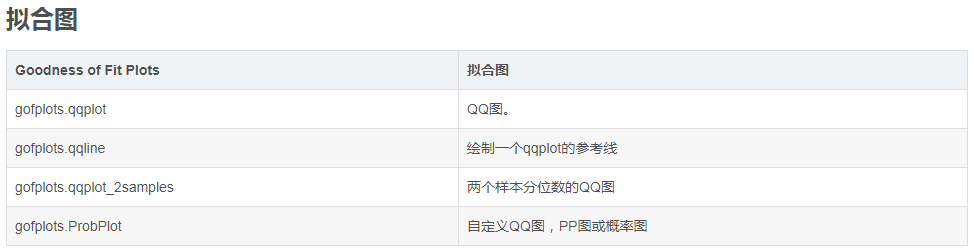

In [11]:
import statsmodels.api as sm
from matplotlib import pyplot
import scipy.stats as stats

data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
mod_fit = sm.OLS(data.endog,data.exog).fit()
res = mod_fit.resid#residuals

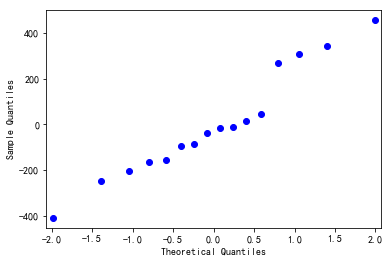

In [7]:
#残差对带有4个自由度的t分布分位数的qqplot：
fig = sm.qqplot(res,stats.t,distargs = (4,))

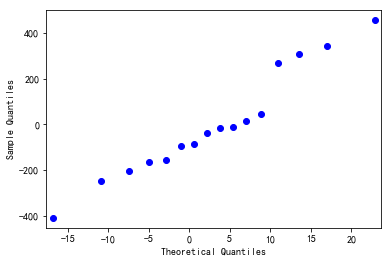

In [9]:
#与上面相同的qqplot，但平均值为3和std为10：
fig = sm.qqplot(res,stats.t,distargs = (4,),loc = 3,scale = 10)

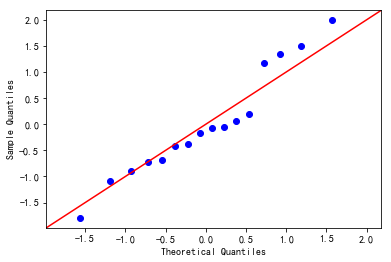

In [10]:
#自动确定t分布的参数，包括位置和比例：
fig = sm.qqplot(res,stats.t,fit = True,line = '45')

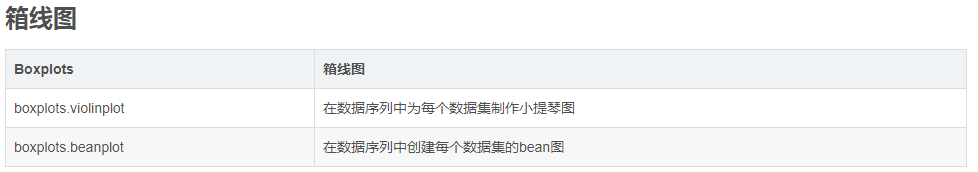

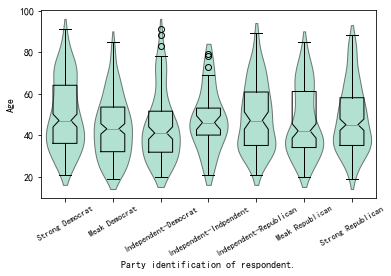

In [14]:
import numpy as np
import matplotlib.pyplot as plt
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = ["Strong Democrat", "Weak Democrat", "Independent-Democrat",
          "Independent-Indpendent", "Independent-Republican",
           "Weak Republican", "Strong Republican"]
plt.rcParams['figure.subplot.bottom'] = 0.23  # keep labels visible
age = [data.exog['age'][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
sm.graphics.violinplot(age, ax=ax, labels=labels,
                       plot_opts={'cutoff_val':5, 'cutoff_type':'abs',
                                  'label_fontsize':'small',
                                   'label_rotation':30})
ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
plt.show()


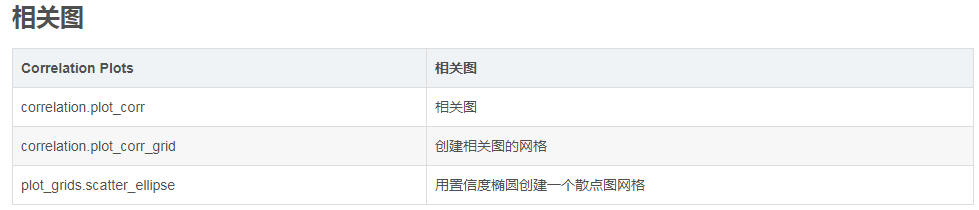

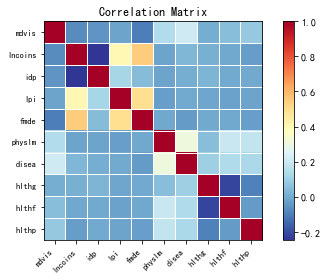

In [16]:
import statsmodels.graphics.api as smg
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
smg.plot_corr(corr_matrix, xnames=hie_data.names)
plt.show()

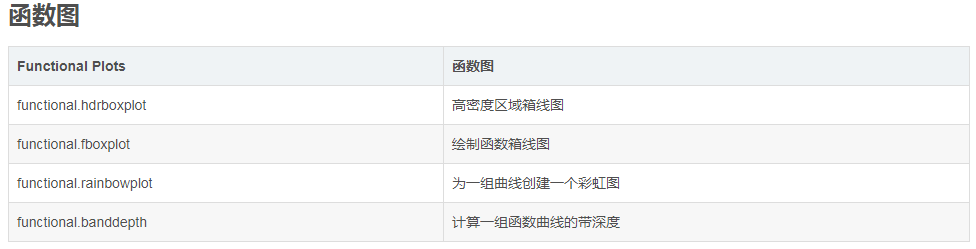

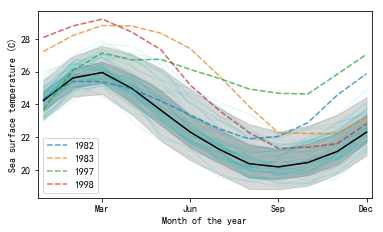

In [20]:
data = sm.datasets.elnino.load()
fig = plt.figure()
ax = fig.add_subplot(111)
res = sm.graphics.hdrboxplot(data.raw_data[:, 1:],
                             labels=data.raw_data[:, 0].astype(int),
                             ax=ax)

ax.set_xlabel("Month of the year")
ax.set_ylabel("Sea surface temperature (C)")
ax.set_xticks(np.arange(13, step=3) - 1)
ax.set_xticklabels(["", "Mar", "Jun", "Sep", "Dec"])
ax.set_xlim([-0.2, 11.2])
plt.show()

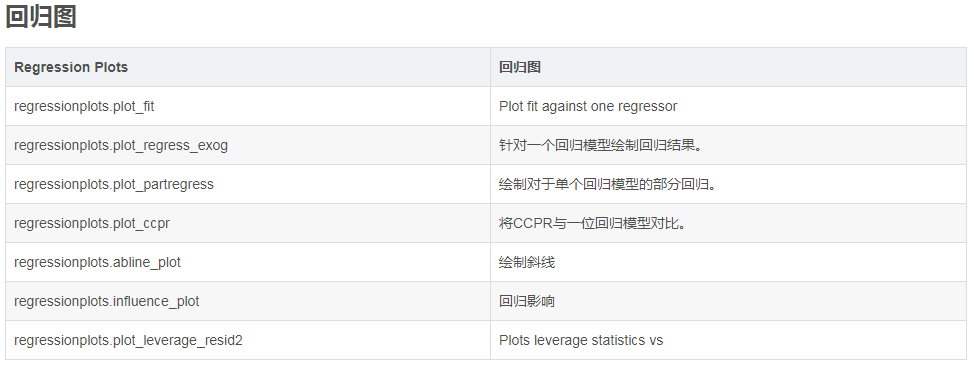

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


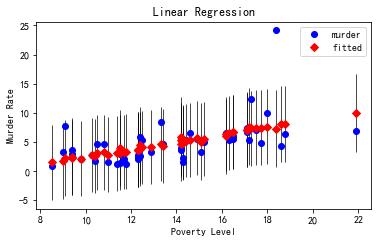

In [22]:
data = sm.datasets.statecrime.load_pandas().data
murder = data['murder']
X = data[['poverty', 'hs_grad']]
X["constant"] = 1
y = murder
model = sm.OLS(y, X)
results = model.fit()

#绘制‘贫穷’变量图
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Poverty Level")
ax.set_title("Linear Regression")
plt.show()

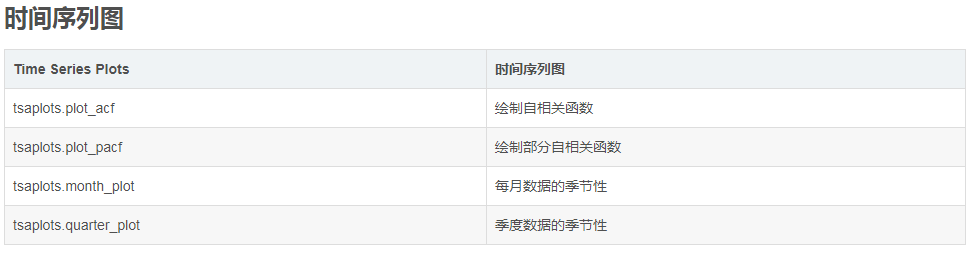

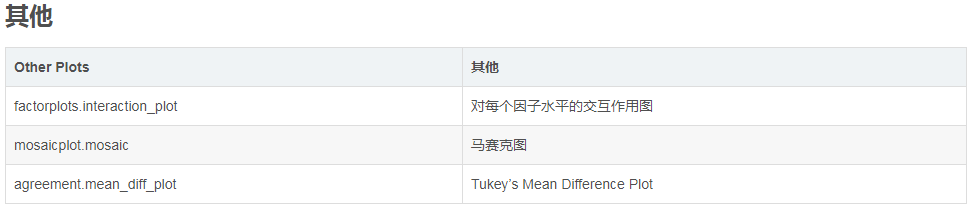